<a href="https://colab.research.google.com/github/01PrathamS/Backprop/blob/main/scalars_network_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d = a*b + c

In [22]:
h = 0.00001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
a += h
d2 = a*b + c
print(d1)
print(d2)
print("slope,",(d2 - d1)/h)

4.0
3.9999699999999994
slope, -3.000000000064062


In [50]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value({self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0

    for node in reversed(topo):
      node._backward()



In [24]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b ; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(-8.0)

In [25]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={"rankdir": "LR"})
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
    if n._op:
      dot.node(name=uid + n._op, label=n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  return dot

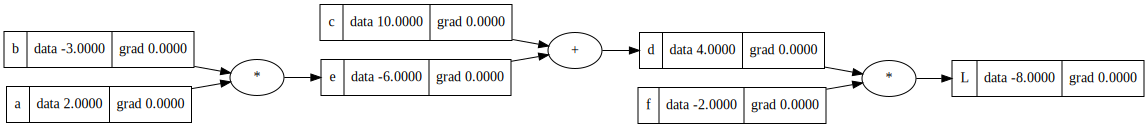

In [26]:
draw_dot(L)

In [27]:
L.grad = 1.0

In [28]:
f.grad = 4.0
d.grad = -2.0

In [29]:
"""
L = d * f

dL/dd = f

(f(x+h) - f(x))/h ;
((d + h)*f) - (d*f) / h  ;
(d*f + h*f - d*f) / h ;
(h*f) / h
f


"""

'\nL = d * f\n\ndL/dd = f\n\n(f(x+h) - f(x))/h ;\n((d + h)*f) - (d*f) / h  ;\n(d*f + h*f - d*f) / h ;\n(h*f) / h\nf\n\n\n'

In [30]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b ; e.label = 'e'
  d = e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d * f; L.label='L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b ; e.label = 'e'
  d = e + c ; d.label='d'
  f = Value(-2.0, label='f')
  L = d * f; L.label='L'
  L2 = L.data

  print((L2-L1)/h)

lol()

0.0


In [31]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'

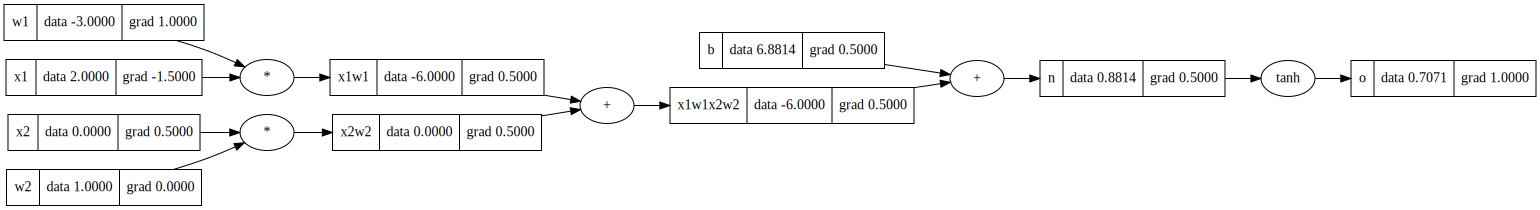

In [43]:

draw_dot(o)

In [42]:
o.backward()

In [34]:
o.grad = 1.0

o._backward()

n._backward()

x1w1x2w2._backward()

b._backward()

x1w1._backward()

x2w2._backward()

w1._backward()

w2._backward()

x1._backward()

x2._backward()


In [35]:
# o.grad = 1.0

# n.grad = 1 - o.data**2

# x1w1x2w2.grad = 1.0 * n.grad
# b.grad = 1.0 * n.grad

# x1w1.grad = 1.0 * x1w1x2w2.grad
# x2w2.grad = 1.0 * x1w1x2w2.grad

# x1.grad = w1.data * x1w1.grad
# w1.grad = x1.data * x1w1.grad

# x2.grad = w2.data * x2w2.grad
# w2.grad = x2.data * x2w2.grad

In [36]:
topo = []
visited = set()

def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(-3.0),
 Value(2.0),
 Value(-6.0),
 Value(0.0),
 Value(1.0),
 Value(0.0),
 Value(-6.0),
 Value(6.881373587019543),
 Value(0.8813735870195432),
 Value(0.7071067811865476)]

In [51]:
## here's a bug that needs to be fixed : overriding gradient

a = Value(3.0, label='a')
b = a + a ; b.label='b'
b.backward()


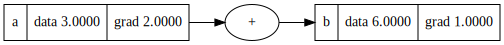

In [52]:
draw_dot(b)

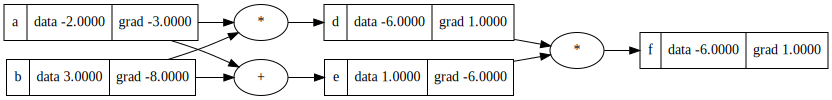

In [54]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a*b ; d.label='d'
e = a + b ; e.label='e'
f = d * e ; f.label='f'
f.backward()

draw_dot(f)

## few more expression: substraction, division, ...

In [93]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value({self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  ## 2 + x not work --> 2 + x --> works after this function
  def __radd__(self, other):
    return self + other

  ## 2 * x not work --> x * 2 --> works after this function
  def __rmul__(self, other):
    return self * other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self, ), '**')
    def _backward():
      self.grad += (other * (self.data**(other-1))) * out.grad
    out._backward = _backward
    return out

  def __truediv__(self, other): ## self / other
    return self * other**-1

  # def __neg__(self): # -self
  #   return self * -1

  def __sub__(self, other): # self - other
    return self + (-1 * (other))

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0

    for node in reversed(topo):
      node._backward()



In [80]:
a = Value(2.0)
2 * a

Value(4.0)

In [94]:
a = Value(2.0)
b = Value(4.0)
a.__sub__(b)

Value(-2.0)

In [100]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'

# -------
e = (2*n).exp()
o = (e - 1 ) / (e + 1)
# ------------
o.label = 'o'
o.backward()

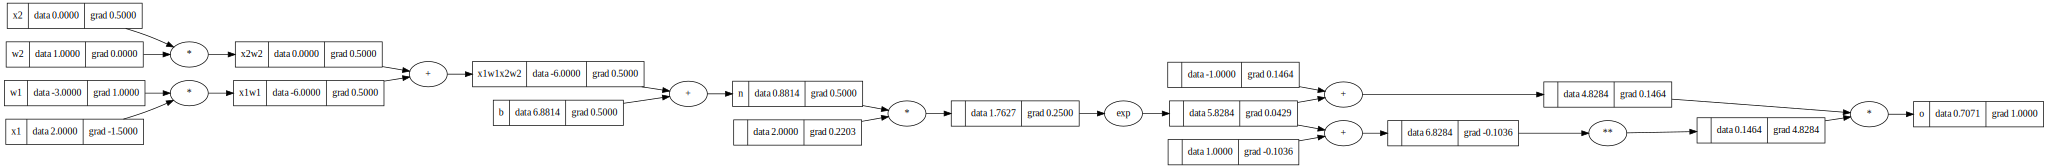

In [101]:
draw_dot(o)

In [102]:
import torch

x1 = torch.tensor([2.0], requires_grad=True)
x2 = torch.tensor([0.0], requires_grad=True)
w1 = torch.tensor([-3.0], requires_grad=True)
w2 = torch.tensor([1.0], requires_grad=True)

b = torch.tensor([6.8813735870195432], requires_grad=True)

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())

o.backward()

print("***************************")

print(x1.grad.item())
print(x2.grad.item())
print(w1.grad.item())
print(w2.grad.item())

0.7071067094802856
***************************
-1.5000003576278687
0.5000001192092896
1.000000238418579
0.0
